<a href="https://colab.research.google.com/github/joshdsolis/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/module1-OLS-regression/Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [13]:
##### Your Code Here #####
from sklearn.model_selection import train_test_split
y = df.price
X = df.sqft_living


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)
X_train = X_train.reshape(-1,1)
Y_train = Y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)
print(X.shape, "\n")

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(21613,) 

(10806, 1)
(10807, 1)
(10806, 1)
(10807, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

model.fit(X_train,Y_train)

print("Coefficient: \n",model.coef_)
print("\n Intercept: ",model.intercept_)

m_hat = model.coef_[0]
b_hat = model.intercept_

Coefficient: 
 [[268.42931803]]

 Intercept:  [-20631.15655449]


In [18]:
import numpy as np
y_test_predict = model.predict(X_test)

MSE = mean_squared_error(Y_test, y_test_predict)

RMSE = (np.sqrt(MSE))

print("MSE is {}".format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(Y_test, y_test_predict)

print('R^2 is {}'.format(R2))

MSE is 75628624138.70985
RMSE is 275006.58926416625
R^2 is 0.49226256935760826


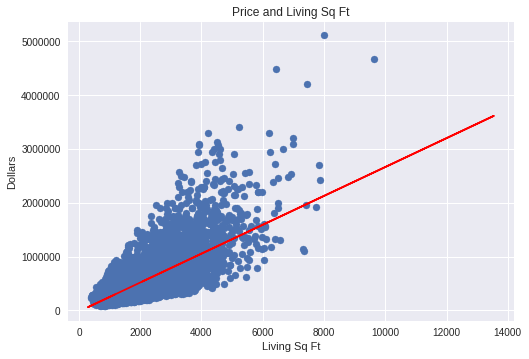

In [36]:
import matplotlib.pyplot as plt

plt.scatter(X_train,Y_train)

y_hat = [m_hat*x + b_hat for x in X_test]
plt.plot(X_test, y_hat,color = 'red');

plt.xlabel("Living Sq Ft")
plt.ylabel("Dollars")
plt.title("Price and Living Sq Ft");

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [56]:
y = df.loc[:,["price"]].values
X = df.loc[:, ['bathrooms','sqft_living']].values

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

#X_train = X_train.reshape(-1,1)
#Y_train = Y_train.reshape(-1,1)
#X_test = X_test.reshape(-1,1)
#Y_test = Y_test.reshape(-1,1)
#X = X.reshape(-1,1)
#y = y.reshape(-1,1)
print(X.shape, "\n")

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(21613, 2) 

(10806, 2)
(10807, 2)
(10806, 1)
(10807, 1)


In [57]:
##### Your Code Here #####


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

model.fit(X_train,Y_train)


beta_0 = model.intercept_
beta_i = model.coef_[0]

print("Slope Coefficients: ", beta_i)
print("\nIntercept Value: ", beta_0)

Slope Coefficients:  [1460.38026342  267.508047  ]

Intercept Value:  [-21808.80450271]


In [58]:
y_test_predict = model.predict(X_test)

MSE = mean_squared_error(Y_test, y_test_predict)

RMSE = (np.sqrt(MSE))

print("MSE is {}".format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(Y_test, y_test_predict)

print('R^2 is {}'.format(R2))

MSE is 75637890356.61333
RMSE is 275023.4360133938
R^2 is 0.49220036003245304


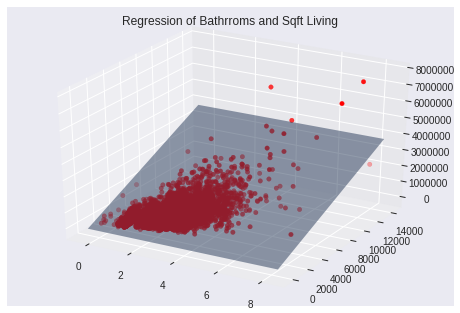

In [71]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(df['bathrooms'],df['sqft_living'], df['price'], c = 'red')

x1 = np.array(ax.get_xlim())
y1 = np.array(ax.get_ylim())
xx, yy = np.meshgrid(x1,y1)
zz = beta_i[0]*xx + beta_i[1]*yy + beta_0[0]

plt3d = plt.gca(projection = '3d')

plt3d.plot_surface(xx,yy,zz,alpha=0.5);

plt.title("Regression of Bathrroms and Sqft Living");

# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [85]:
##### Your Code Here #####
from sklearn.model_selection import train_test_split

y = df['price']
X = df.drop('price', axis=1)
X = X.drop('date', axis=1)
X = X.drop('id', axis=1)
X = X.drop('zipcode', axis=1)
X = X.drop('lat', axis=1)
X = X.drop('long', axis=1)


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = .5, random_state = 42)

print(X.shape, "\n")

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(21613, 15) 

(10806, 15)
(10807, 15)
(10806,)
(10807,)


In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train,Y_train)

print("Coefficient: \n",model.coef_)
print("\n Intercept: ",model.intercept_)

Coefficient: 
 [-4.01060016e+04  4.44775932e+04  1.00419914e+02 -2.95786477e-02
  3.18485854e+04  5.68750522e+05  4.25914661e+04  1.70740771e+04
  1.21906330e+05  4.24169748e+01  5.80029399e+01 -3.45232894e+03
  1.05517173e+01  2.93851295e+01 -5.49723876e-01]

 Intercept:  5977237.319878921


In [87]:
y_test_predict = model.predict(X_test)

MSE = mean_squared_error(Y_test, y_test_predict)

RMSE = np.sqrt(MSE)

print("MSE is {}".format(MSE))
print('RMSE is {}'.format(RMSE))


R2 = r2_score(Y_test, y_test_predict)

print('R^2 is {}'.format(R2))

MSE is 53064494262.60505
RMSE is 230357.31866516647
R^2 is 0.643748246354219


# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- Write a blog post explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
